<a href="https://colab.research.google.com/github/aborundiya/NeuralNetwork/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the libraries needed for the model training, visualization 

In [0]:
import sklearn.datasets
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

#Importing Data Sets and pre-processing

In [0]:
#load the data set through the sklearn libraries. Segregate into input and output

breast_cancer = sklearn.datasets.load_breast_cancer()
input_data = breast_cancer.data
output_data = breast_cancer.target 


#Converting Data into Pandas DataFrames 

In [0]:
data = pd.DataFrame(input_data,columns = breast_cancer.feature_names)
data['class'] = output_data

#Creating the data as Input and Target 
#Splitting the data in Train and Test dataset

In [0]:
data_input = data.drop('class',axis=1)
data_target = data['class']
data_train, data_test, target_train, target_test = train_test_split(data_input, data_target, test_size = 0.2, stratify = data_target, random_state =1 )
data_train = data_train.values 
data_test = data_test.values 


In [0]:
class Perceptron:
  
  def __init__(self):
    self.b = None 
    self.w = None 
    
  def model(self, inData):
    return 1 if (np.dot(self.w, inData) >= self.b) else 0
  
  def predict(self, inData):
    output = []
    for x in inData:
      result = self.model(x)
      output.append(result)    
    return (np.array(output))
      
  def fit(self, inData, tgData, epochs = 1, lr = 1  ):
    self.w = np.ones(inData.shape[1])
    self.b = 0 
    accuracy = {}
    max_accuracy = 0
    for i in range(epochs): 
      
      for x,y in zip(inData,tgData): 
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          #learning rate is applied to make gradual changes to the parameters
          self.w = self.w + lr * x 
          self.b = self.b + lr * 1
        elif y== 0 and y_pred == 1 :
          self.w = self.w - lr * x 
          self.b = self.b - lr * 1
        accuracy[i] = accuracy_score(self.predict(inData),tgData)
        if (accuracy[i] > max_accuracy):
          max_accuracy = accuracy[i]
          
          #we see lot of osillations in the acurracy curve and observe at the 
          #end of the last epoch we have model with lower accuracy then some 
          #accuracy in earlier epoch. to overcome this we wil introduce what 
          #is called as Checkpoint which is saving the parameters (w,b) for 
          #better accuracy and re-running epoch with these parameters. 
          
          chkptw = self.w 
          chkptb = self.b
          
    self.w = chkptw
    self.b = chkptb
    print(max_accuracy)
    plt.plot(accuracy.values())
    plt.ylim([0,1])
    plt.show()

        
      
    

#Training the models

0.9208791208791208


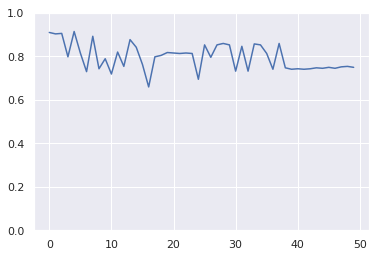

0.9208791208791208


In [82]:
#Initialize the perceptron and train the model 
perceptron = Perceptron()
perceptron.fit(data_train, target_train, 50,0.001)

#Training Accuracy 
y_train_pred = perceptron.predict(data_train)
print(accuracy_score (y_train_pred, target_train))

# Testing the Model Efficiecy with test data

In [77]:
y_test_pred = perceptron.predict(data_test)
print(accuracy_score(y_test_pred,target_test))

0.9298245614035088
